# SVM线性分类器

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utilities
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report

In [2]:
input_file = 'E://tensorflow//jupyter//machine_learing_damo//3.data//data_multivar.txt'
X,Y = utilities.load_data(input_file)

In [3]:
class_0 = np.array([X[i] for i in range(len(X)) if Y[i] == 0])
class_1 = np.array([X[i] for i in range(len(X)) if Y[i] == 1])

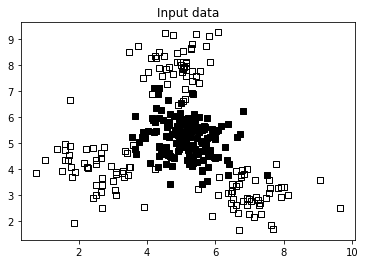

In [4]:
plt.figure()
plt.scatter(class_0[:,0], class_0[:,1], facecolors='black', edgecolors='black',
marker='s')
plt.scatter(class_1[:,0], class_1[:,1], facecolors='None', edgecolors='black',
marker='s')
plt.title('Input data')
plt.show()

E:\tensorflow\jupyter\machine_learing_damo\3.预测建模\utilities.py:46: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)


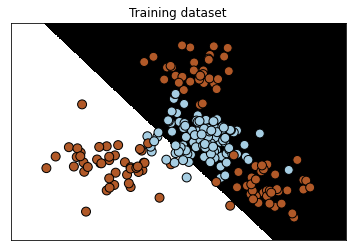

In [5]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=5)
params = {'kernel': 'linear'}
classifier = SVC(**params) 
classifier.fit(X_train, Y_train) 
utilities.plot_classifier(classifier, X_train, Y_train, 'Training dataset')
plt.show() 

E:\tensorflow\jupyter\machine_learing_damo\3.预测建模\utilities.py:46: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)


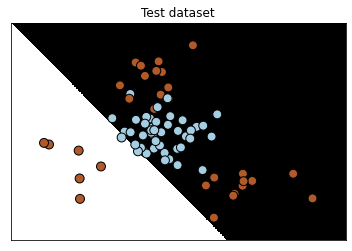

In [6]:
y_test_pred = classifier.predict(X_test)
utilities.plot_classifier(classifier, X_test, Y_test, 'Test dataset')

In [7]:
#训练数据集的准确性
target_names = ['Class-' + str(int(i)) for i in set(Y)]
print("\nClassifier performance on training dataset\n")
print(classification_report(Y_train, classifier.predict(X_train), target_names=target_names))


Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.55      0.88      0.68       105
     Class-1       0.78      0.38      0.51       120

    accuracy                           0.61       225
   macro avg       0.66      0.63      0.59       225
weighted avg       0.67      0.61      0.59       225



In [8]:
#测试数据集的准确性
print("Classification report on test dataset\n")
print(classification_report(Y_test, y_test_pred, target_names=target_names))

Classification report on test dataset

              precision    recall  f1-score   support

     Class-0       0.64      0.96      0.77        45
     Class-1       0.75      0.20      0.32        30

    accuracy                           0.65        75
   macro avg       0.70      0.58      0.54        75
weighted avg       0.69      0.65      0.59        75



# 非线性分类器

E:\tensorflow\jupyter\machine_learing_damo\3.预测建模\utilities.py:46: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)


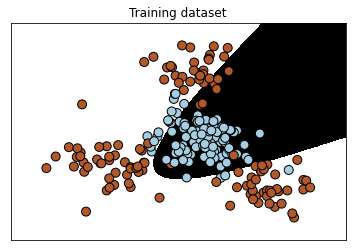

In [9]:
params = {'kernel': 'poly', 'degree': 3} #多项式核函数
classifier = SVC(**params) 
classifier.fit(X_train, Y_train) 
utilities.plot_classifier(classifier, X_train, Y_train, 'Training dataset')
plt.show() 

E:\tensorflow\jupyter\machine_learing_damo\3.预测建模\utilities.py:46: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)


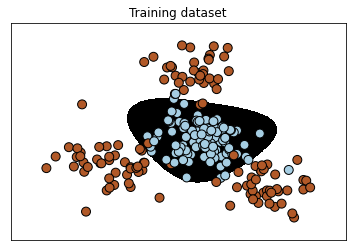

In [13]:
params = {'kernel': 'rbf'}   #径向基核函数
classifier = SVC(**params) 
classifier.fit(X_train, Y_train) 
utilities.plot_classifier(classifier, X_train, Y_train, 'Training dataset')
plt.show() 

In [15]:
print(classification_report(Y_train, classifier.predict(X_train), target_names=target_names))

              precision    recall  f1-score   support

     Class-0       0.95      0.96      0.96       105
     Class-1       0.97      0.96      0.96       120

    accuracy                           0.96       225
   macro avg       0.96      0.96      0.96       225
weighted avg       0.96      0.96      0.96       225



# 解决数据不平衡
params = {'kernel': 'linear', 'class_weight': 'auto'} 